In [143]:
#Loading updated stats
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math 


df_4 = pd.read_csv('stats4.csv') 

In [2]:
df_4.head()

,Index,Player,AVG,OPS,GP-GS,AB,R,H,2B,3B,...,TB,SLG%,BB,HBP,SO,GDP,OB%,SF,SH,SB-ATT
0,17,"Melnick, Danny",0.345,1.045,35-35,139,35,48,15,0,...,87,0.626,16,3,31,3,0.419,2,0,4-4
1,26,"Donofrio, Anthony",0.317,0.803,37-34,145,31,46,8,1,...,62,0.428,11,3,24,1,0.375,1,1,15-17
2,3,"O'Connor, Keegan",0.302,0.785,40-39,149,20,45,11,0,...,62,0.416,7,10,51,0,0.369,2,0,3-4
3,5,"Zimbardo, Jared",0.298,0.859,37-35,141,23,42,10,2,...,68,0.482,12,6,37,0,0.377,0,3,7-11
4,1,"Maves, Kyle",0.285,0.753,40-39,158,38,45,7,3,...,58,0.367,27,1,37,3,0.386,3,3,22-28


In [3]:
df4_H = df_4.sort_values(by='H', ascending=False)
df4_H[['Player', 'H', 'AVG', 'AB']]

,Player,H,AVG,AB
0,"Melnick, Danny",48,0.345,139
1,"Donofrio, Anthony",46,0.317,145
2,"O'Connor, Keegan",45,0.302,149
4,"Maves, Kyle",45,0.285,158
3,"Zimbardo, Jared",42,0.298,141
6,"Ostberg, Ian",31,0.313,99
5,"Kohn, Michael",30,0.259,116
10,"Tuffy, McGwire",23,0.245,94
7,"DeRosa, Matt",18,0.277,65
14,"LaChance, Sam",16,0.195,82


In [13]:
#strike out rate

DeRosa_SO = df_4.loc[7].at['SO']
DeRosa_AB = df_4.loc[7].at['AB']

SO_rate_DeRosa = DeRosa_SO/DeRosa_AB
SO_rate_DeRosa

0.16923076923076924

In [14]:
#strike out rate

Tuffy_SO = df_4.loc[10].at['SO']
Tuffy_AB = df_4.loc[10].at['AB']

SO_rate_Tuffy = Tuffy_SO/Tuffy_AB
SO_rate_Tuffy

0.23404255319148937

In [15]:
Maves_SO = df_4.loc[4].at['SO']
Maves_AB = df_4.loc[4].at['AB']

SO_rate_Maves = Maves_SO/Maves_AB
SO_rate_Maves

0.23417721518987342

Team average hits:  23


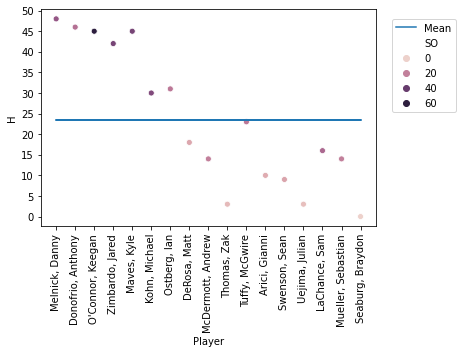

In [152]:
#calculating mean of hits
y_mean = df_4['H'].mean()
print("Team average hits: ", round(y_mean))


#Making a scatter plot to show H(Hits)
model_1 = sb.scatterplot(data=df_4, x = "Player", y ='H', hue='SO')

#ploting mean a line
mean_line = sb.lineplot(x='Player', y=y_mean, data=df_4, label='Mean', linestyle='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)
model_1.set_xticklabels(df_4['Player'], rotation=90 )
model_1.set_yticks(range(0,55,5))


#MODEL SHOWS THE AB'S OF ALL PLAYERS AND THE MEAN OF THEIR HITS
#SHOWS THE PLAYERS ON X-AXIS AND HITS ON THE Y-AXIS

In [53]:
atbats = df_4[['AB','H']]
atbats.where(atbats < 100)




,AB,H
0,NaN,48
1,NaN,46
2,NaN,45
3,NaN,42
4,NaN,45
5,NaN,30
6,99.0,31
7,65.0,18
8,51.0,14
9,11.0,3


In [99]:
data = df_4.copy()
data

,Index,Player,AVG,OPS,GP-GS,AB,R,H,2B,3B,...,TB,SLG%,BB,HBP,SO,GDP,OB%,SF,SH,SB-ATT
0,17,"Melnick, Danny",0.345,1.045,35-35,139,35,48,15,0,...,87,0.626,16,3,31,3,0.419,2,0,4-4
1,26,"Donofrio, Anthony",0.317,0.803,37-34,145,31,46,8,1,...,62,0.428,11,3,24,1,0.375,1,1,15-17
2,3,"O'Connor, Keegan",0.302,0.785,40-39,149,20,45,11,0,...,62,0.416,7,10,51,0,0.369,2,0,3-4
3,5,"Zimbardo, Jared",0.298,0.859,37-35,141,23,42,10,2,...,68,0.482,12,6,37,0,0.377,0,3,7-11
4,1,"Maves, Kyle",0.285,0.753,40-39,158,38,45,7,3,...,58,0.367,27,1,37,3,0.386,3,3,22-28
5,38,"Kohn, Michael",0.259,0.869,37-31,116,23,30,5,0,...,59,0.509,17,2,35,0,0.360,1,2,1-1
6,12,"Ostberg, Ian",0.313,0.899,26-25,99,13,31,9,0,...,52,0.525,10,2,22,0,0.374,4,1,3-7
7,24,"DeRosa, Matt",0.277,0.704,22-18,65,8,18,4,0,...,25,0.385,4,0,11,3,0.319,0,1,1-2
8,44,"McDermott, Andrew",0.275,0.927,26-16,51,11,14,4,0,...,24,0.471,13,4,20,0,0.456,0,0,4-4
9,16,"Thomas, Zak",0.273,0.793,4-3,11,3,3,1,0,...,4,0.364,2,1,7,0,0.429,0,1,0-0


In [107]:
under100 = data.drop(index=[0,1,2,3,4,5])
under100



,Index,Player,AVG,OPS,GP-GS,AB,R,H,2B,3B,...,TB,SLG%,BB,HBP,SO,GDP,OB%,SF,SH,SB-ATT
6,12,"Ostberg, Ian",0.313,0.899,26-25,99,13,31,9,0,...,52,0.525,10,2,22,0,0.374,4,1,3-7
7,24,"DeRosa, Matt",0.277,0.704,22-18,65,8,18,4,0,...,25,0.385,4,0,11,3,0.319,0,1,1-2
8,44,"McDermott, Andrew",0.275,0.927,26-16,51,11,14,4,0,...,24,0.471,13,4,20,0,0.456,0,0,4-4
9,16,"Thomas, Zak",0.273,0.793,4-3,11,3,3,1,0,...,4,0.364,2,1,7,0,0.429,0,1,0-0
10,4,"Tuffy, McGwire",0.245,0.712,30-28,94,19,23,1,1,...,29,0.309,12,13,22,0,0.403,0,1,2-4
11,8,"Arici, Gianni",0.244,0.620,16-8,41,5,10,1,0,...,14,0.341,2,0,10,1,0.279,0,0,0-0
12,13,"Swenson, Sean",0.205,0.809,18-13,44,8,9,0,0,...,18,0.409,10,5,12,0,0.400,1,0,0-1
13,2,"Uejima, Julian",0.200,0.533,11-5,15,7,3,0,0,...,3,0.200,2,1,6,0,0.333,0,0,3-3
14,22,"LaChance, Sam",0.195,0.657,29-21,82,18,16,3,0,...,28,0.341,10,5,26,2,0.316,1,1,1-2
15,33,"Mueller, Sebastian",0.189,0.570,23-19,74,4,14,3,0,...,23,0.311,5,2,20,3,0.259,0,1,1-1


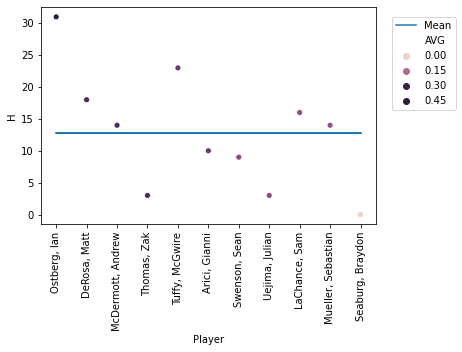

In [121]:
new_y_mean = under100['H'].mean()
new_y_mean


#Making a scatter plot to show H(Hits)
model_2 = sb.scatterplot(data=under100, x = "Player", y ='H', hue='AVG')

#ploting mean a line
mean_line = sb.lineplot(x='Player', y=new_y_mean, data=under100, label='Mean', linestyle='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)
model_2.set_xticklabels(under100['Player'], rotation=90 )
model_2.set_yticks(range(0,35,5))$


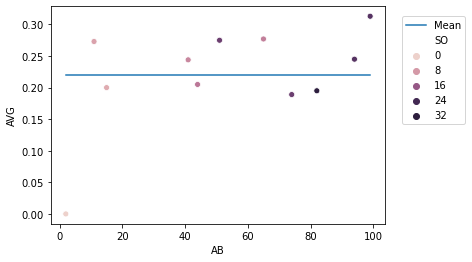

In [147]:
#Making a scatter plot to show H(Hits)
model_4 = sb.scatterplot(data=under100, x = "AB", y ='AVG', hue='SO')

#ploting mean a line
mean_line2 = sb.lineplot(x='AB', y=mean_avg, data=under100, label='Mean', linestyle='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)
#model_4.set_xticklabels(under100['Player'], rotation=90 )
